In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('sales_data_sample.csv', encoding = 'Latin-1')

In [3]:
data.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ORDERNUMBER       2823 non-null   int64  
 1   QUANTITYORDERED   2823 non-null   int64  
 2   PRICEEACH         2823 non-null   float64
 3   ORDERLINENUMBER   2823 non-null   int64  
 4   SALES             2823 non-null   float64
 5   ORDERDATE         2823 non-null   object 
 6   STATUS            2823 non-null   object 
 7   QTR_ID            2823 non-null   int64  
 8   MONTH_ID          2823 non-null   int64  
 9   YEAR_ID           2823 non-null   int64  
 10  PRODUCTLINE       2823 non-null   object 
 11  MSRP              2823 non-null   int64  
 12  PRODUCTCODE       2823 non-null   object 
 13  CUSTOMERNAME      2823 non-null   object 
 14  PHONE             2823 non-null   object 
 15  ADDRESSLINE1      2823 non-null   object 
 16  ADDRESSLINE2      302 non-null    object 


In [5]:
data.isnull().sum()

ORDERNUMBER            0
QUANTITYORDERED        0
PRICEEACH              0
ORDERLINENUMBER        0
SALES                  0
ORDERDATE              0
STATUS                 0
QTR_ID                 0
MONTH_ID               0
YEAR_ID                0
PRODUCTLINE            0
MSRP                   0
PRODUCTCODE            0
CUSTOMERNAME           0
PHONE                  0
ADDRESSLINE1           0
ADDRESSLINE2        2521
CITY                   0
STATE               1486
POSTALCODE            76
COUNTRY                0
TERRITORY           1074
CONTACTLASTNAME        0
CONTACTFIRSTNAME       0
DEALSIZE               0
dtype: int64

In [6]:
data.columns

Index(['ORDERNUMBER', 'QUANTITYORDERED', 'PRICEEACH', 'ORDERLINENUMBER',
       'SALES', 'ORDERDATE', 'STATUS', 'QTR_ID', 'MONTH_ID', 'YEAR_ID',
       'PRODUCTLINE', 'MSRP', 'PRODUCTCODE', 'CUSTOMERNAME', 'PHONE',
       'ADDRESSLINE1', 'ADDRESSLINE2', 'CITY', 'STATE', 'POSTALCODE',
       'COUNTRY', 'TERRITORY', 'CONTACTLASTNAME', 'CONTACTFIRSTNAME',
       'DEALSIZE'],
      dtype='object')

In [7]:
data.drop(['ORDERNUMBER', 'PRICEEACH', 'ORDERDATE', 'CUSTOMERNAME', 'PHONE', 'ADDRESSLINE1', 'ADDRESSLINE2', 'CITY', 'STATE', 'POSTALCODE', 'COUNTRY', 'TERRITORY', 'CONTACTLASTNAME', 'CONTACTFIRSTNAME'], axis = 1, inplace = True)

In [8]:
data.isnull().sum()

QUANTITYORDERED    0
ORDERLINENUMBER    0
SALES              0
STATUS             0
QTR_ID             0
MONTH_ID           0
YEAR_ID            0
PRODUCTLINE        0
MSRP               0
PRODUCTCODE        0
DEALSIZE           0
dtype: int64

In [9]:
data.dtypes

QUANTITYORDERED      int64
ORDERLINENUMBER      int64
SALES              float64
STATUS              object
QTR_ID               int64
MONTH_ID             int64
YEAR_ID              int64
PRODUCTLINE         object
MSRP                 int64
PRODUCTCODE         object
DEALSIZE            object
dtype: object

In [10]:
list_cat = data.select_dtypes(include = 'object').columns.tolist()

In [11]:
list_cat

['STATUS', 'PRODUCTLINE', 'PRODUCTCODE', 'DEALSIZE']

In [12]:
from sklearn import preprocessing

In [13]:
le = preprocessing.LabelEncoder()

In [14]:
for i in list_cat :
    data[i] = le.fit_transform(data[i])

In [15]:
data.dtypes

QUANTITYORDERED      int64
ORDERLINENUMBER      int64
SALES              float64
STATUS               int32
QTR_ID               int64
MONTH_ID             int64
YEAR_ID              int64
PRODUCTLINE          int32
MSRP                 int64
PRODUCTCODE          int32
DEALSIZE             int32
dtype: object

In [16]:
data['SALES'] = data['SALES'].astype(int)

In [17]:
data.dtypes

QUANTITYORDERED    int64
ORDERLINENUMBER    int64
SALES              int32
STATUS             int32
QTR_ID             int64
MONTH_ID           int64
YEAR_ID            int64
PRODUCTLINE        int32
MSRP               int64
PRODUCTCODE        int32
DEALSIZE           int32
dtype: object

In [18]:
X = data[['SALES', 'PRODUCTLINE']]

In [20]:
from sklearn.cluster import KMeans

In [22]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 0).fit(X)

In [23]:
kmeans.labels_

array([1, 1, 1, ..., 2, 0, 1])

In [25]:
kmeans.cluster_centers_

array([[1.87262891e+03, 2.91992188e+00],
       [3.40887767e+03, 2.48737864e+00],
       [5.28761579e+03, 2.17719298e+00],
       [7.98317588e+03, 1.54271357e+00]])

In [28]:
kmeans.n_iter_

9

In [29]:
from collections import Counter

In [30]:
Counter(kmeans.labels_)

Counter({0: 1031, 1: 1024, 2: 569, 3: 199})

<Axes: xlabel='SALES', ylabel='PRODUCTCODE'>

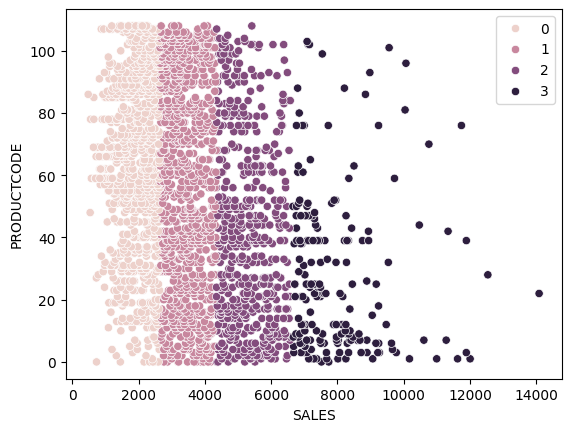

In [37]:
sns.scatterplot(data = X, x = data["SALES"], y = data["PRODUCTCODE"], hue = kmeans.labels_)